# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - FREQUÊNCIA_CP

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cs.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO
0,2023,4645101,7885
1,2023,4691500,1569
2,2023,4641902,1219
3,2023,4635401,1219
4,2023,4623109,1219
...,...,...,...
85176660,1903,9499500,921
85176661,1901,9499500,8927
85176662,1901,9493600,8927
85176663,1901,9609299,6645


In [2]:
# Calculando a frequência e adicionando a coluna FREQUÊNCIA_CP
frequencia_cp = df.groupby(['MUNICÍPIO', 'CNAE_FISCAL_SECUNDÁRIA']).size().reset_index(name='FREQUÊNCIA_CP')
df = pd.merge(df, frequencia_cp, on=['MUNICÍPIO', 'CNAE_FISCAL_SECUNDÁRIA'], how='left')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,FREQUÊNCIA_CP
0,2023,4645101,7885,77
1,2023,4691500,1569,31
2,2023,4641902,1219,118
3,2023,4635401,1219,130
4,2023,4623109,1219,209
...,...,...,...,...
85176660,1903,9499500,921,3826
85176661,1901,9499500,8927,258
85176662,1901,9493600,8927,254
85176663,1901,9609299,6645,64


In [3]:
dados_cluster = df[['CNAE_FISCAL_SECUNDÁRIA', 'MUNICÍPIO', 'FREQUÊNCIA_CP']]
dados_cluster

,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,FREQUÊNCIA_CP
0,4645101,7885,77
1,4691500,1569,31
2,4641902,1219,118
3,4635401,1219,130
4,4623109,1219,209
...,...,...,...
85176660,9499500,921,3826
85176661,9499500,8927,258
85176662,9493600,8927,254
85176663,9609299,6645,64


In [4]:
# Realize a amostragem aleatória simples com 0,001% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,FREQUÊNCIA_CP
13371777,4783102,9701,6117
17844177,7420004,5403,834
16910876,8599699,6377,733
49398932,3299099,2913,65
23025343,7911200,3215,3
...,...,...,...
21782925,2511000,7735,16
68496831,134200,6225,79
60948296,4924800,6001,5766
56463131,6209100,7107,48850


In [5]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_SECUNDÁRIA"] = dados_cluster["CNAE_FISCAL_SECUNDÁRIA"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["FREQUÊNCIA_CP", "MUNICÍPIO", "CNAE_FISCAL_SECUNDÁRIA"]).size().reset_index(name="Contagem")

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 9


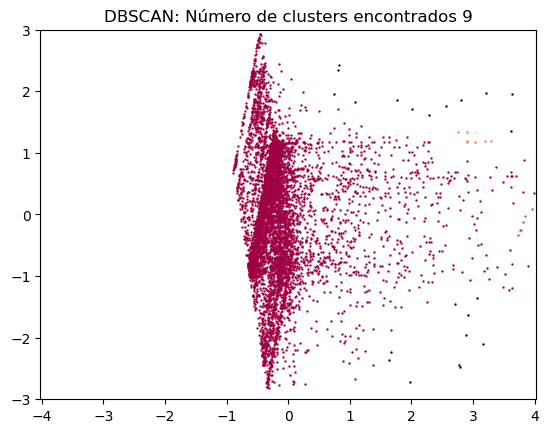

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()
